<a href="https://colab.research.google.com/github/Hriday1001/DTU-AUV/blob/main/BrailleOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = "/content/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from copy import deepcopy
import os
import numpy as np
import pandas as pd
from shutil import copyfile

In [ ]:
os.mkdir('./images/')
alpha = 'a'
for i in range(0, 26): 
	os.mkdir('./images/' + alpha)
	alpha = chr(ord(alpha) + 1)

In [ ]:
rootdir = '/content/Braille Dataset/Braille Dataset/'
for file in os.walk(rootdir):
  for ind_file in file[2]:
    ind_file_string = ''.join(str(elm) for elm in ind_file)
    path = (rootdir + ind_file_string)
    letter = ind_file[0]
    file_string = ''.join(str(element) for element in file[2])
    copyfile(path,('/content/images/' + letter + '/' + ind_file_string))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('./images/',
                                              target_size=(26,26),
                                              subset='training')

val_generator = datagen.flow_from_directory('./images/',
                                            target_size=(26,26),
                                            subset='validation')

Found 1248 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


In [ ]:
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

K.clear_session()

model_ckpt = ModelCheckpoint('BrailleNet.h5',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)

entry = L.Input(shape=(26,26,3))
x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
x = L.LeakyReLU()(x)
x = L.Dense(26,activation='softmax')(x)

model = Model(entry,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              validation_data=val_generator,
                              epochs=100,
                              callbacks=[model_ckpt,reduce_lr,early_stop],
                              verbose=1)

<ipython-input-8-afa36efc8263>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
39/39 [==============================] - 7s 83ms/step - loss: 3.2863 - accuracy: 0.0329 - val_loss: 3.2455 - val_accuracy: 0.0513 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 3s 72ms/step - loss: 3.1196 - accuracy: 0.1050 - val_loss: 2.8060 - val_accuracy: 0.2340 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 4s 114ms/step - loss: 2.5216 - accuracy: 0.2933 - val_loss: 2.1314 - val_accuracy: 0.4006 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 2s 63ms/step - loss: 1.8788 - accuracy: 0.4840 - val_loss: 1.5709 - val_accuracy: 0.5545 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 3s 64ms/step - loss: 1.4529 - accuracy: 0.5938 - val_loss: 1.2503 - val_accuracy: 0.6827 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 3s 64ms/step - loss: 1.1795 - accuracy: 0.6699 - val_loss: 1.0918 - val_accuracy: 0.7051 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 3s 67ms/step - l

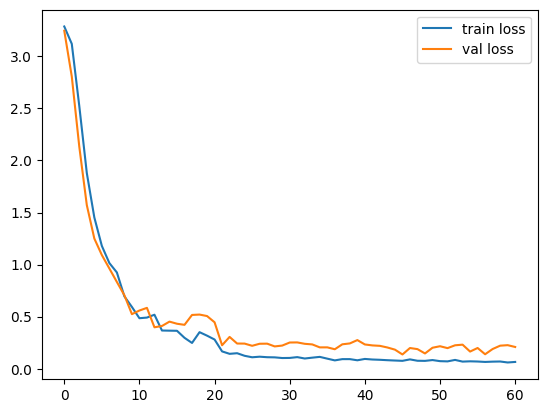

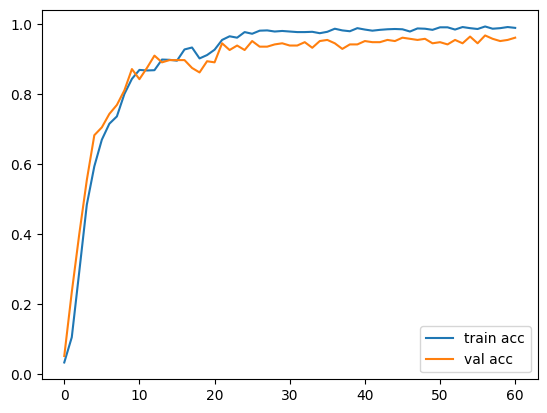

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

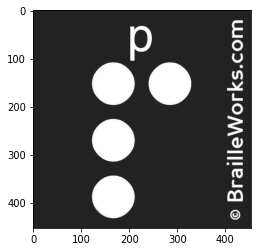

In [ ]:
image = cv2.imread(img_loc,0)
plt.imshow(image,cmap="gray")


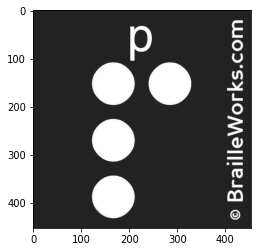

In [ ]:
gray = deepcopy(image)
plt.imshow(gray,cmap="gray")

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


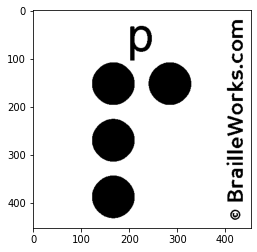

In [ ]:
import imutils
blurred = cv2.GaussianBlur(gray,(5,5),0)
edged = cv2.Canny(blurred,50,200,255)
thresh_inv = cv2.threshold(gray,0,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
ctrs = cv2.findContours(thresh_inv.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
ctrs = imutils.grab_contours(ctrs)
plt.imshow(thresh_inv,cmap="gray")

In [ ]:

x=image.img_to_array(img)

In [ ]:
import cv2

In [ ]:
resized = cv2.resize(x, (28, 28))

In [ ]:
resized=np.expand_dims(resized,axis=0)
model.predict(resized)

NameError: ignored

In [ ]:
a = model.predict(resized)
for i in range(0,a.size):
 if(a[i]==a.max()):
   print(i)

1/1 [==============================] - 0s 18ms/step
0


IndexError: ignored

In [ ]:
a = model.predict(bigger)



1/1 [==============================] - 0s 49ms/step


array([[4.3132931e-10, 2.1052621e-05, 1.0845092e-06, 8.6232030e-04,
        8.3301803e-11, 1.2634073e-02, 3.3513612e-07, 2.1452088e-05,
        8.1614218e-09, 5.3019971e-06, 4.7351428e-12, 4.3004196e-02,
        3.6992640e-09, 1.2195663e-06, 3.0149907e-14, 8.2814610e-01,
        9.8917283e-02, 1.2145812e-04, 5.3891649e-06, 3.3951153e-03,
        4.7769513e-09, 6.7392588e-03, 4.9757878e-03, 1.1132684e-06,
        1.1473298e-03, 2.0541708e-07]], dtype=float32)

In [ ]:
image_loc = "/content/WhatsApp Image 2022-12-15 at 10.59.23 PM.jpeg"

In [ ]:
image = cv2.imread(image_loc,0)

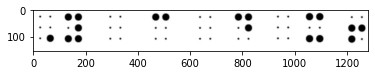

In [ ]:
plt.imshow(image,cmap="gray")

In [ ]:
from copy import deepcopy

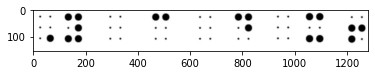

In [ ]:
gray = deepcopy(image)
plt.imshow(gray,cmap="gray")

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imutils

In [ ]:
blurred = cv2.GaussianBlur(gray,(5,5),0)
edged = cv2.Canny(blurred,50,200,255)
thresh_inv = cv2.threshold(gray,0,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
ctrs = cv2.findContours(thresh_inv.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
ctrs = imutils.grab_contours(ctrs)

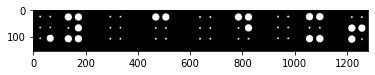

In [ ]:
plt.imshow(thresh_inv,cmap="gray")

In [ ]:
!pip install histograms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for histograms: filename=histograms-1.0.0-py3-none-any.whl size=7083 sha256=79c2ebb4f0a27e08dc81fd90a7b81d9fb32f99e7c6de7df10ad8563d1419c68f
  Stored in directory: /root/.cache/pip/wheels/bf/2a/c5/a1ce7d26b304a4f81f9930740bc0cf482edcb56943e3d2776c
Successfully built histograms


In [ ]:
from histograms import histograms

/usr/local/lib/python3.8/dist-packages/histograms/utils.py:6: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import MultiIndex


In [ ]:
hist = cv2.reduce(thresh_inv.T,1,cv2.REDUCE_AVG).reshape(-1)

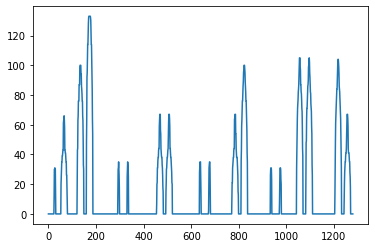

In [ ]:
plt.plot(hist)


(array([1280.,  340.,  304.,  215.,  172.,  132.,   91.,   55.,   17.,
          13.]),
 array([  0. ,  13.3,  26.6,  39.9,  53.2,  66.5,  79.8,  93.1, 106.4,
        119.7, 133. ]),
 <a list of 10 Patch objects>)

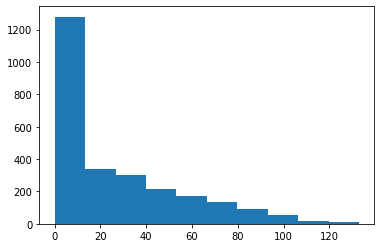

In [ ]:
histo = plt.hist(hist,cumulative=-1)


array([  0. ,  13.3,  26.6,  39.9,  53.2,  66.5,  79.8,  93.1, 106.4,
       119.7, 133. ])

In [ ]:
n

array([1280.,  340.,  304.,  215.,  172.,  132.,   91.,   55.,   17.,
         13.])

In [ ]:
patches

<a list of 10 Patch objects>

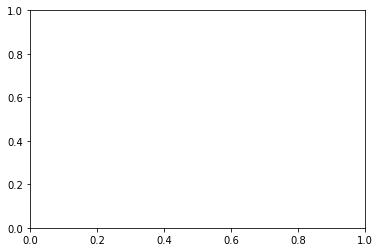

In [ ]:
ax = plt.gca()

In [ ]:
ax.lines[0]

IndexError: ignored

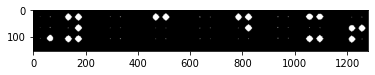

In [ ]:
digitCnts = []
for c in ctrs:
  cv2.drawContours(thresh_inv,c,-1,(0,255,0),3)
plt.figure()
plt.imshow(thresh_inv,cmap="gray")

In [ ]:
hist = cv2.reduce(thresh_inv.T,1,cv2.REDUCE_AVG).reshape(-1)

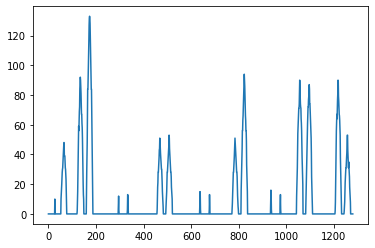

In [ ]:
plt.plot(hist)

(array([1280.,  261.,  211.,  143.,  101.,   68.,   37.,   14.,    9.,
           5.]),
 array([  0. ,  13.3,  26.6,  39.9,  53.2,  66.5,  79.8,  93.1, 106.4,
        119.7, 133. ]),
 <a list of 10 Patch objects>)

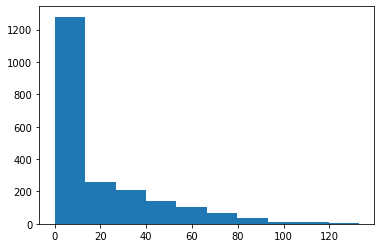

In [ ]:
histo = plt.hist(hist,cumulative=-1)
histo